In [5]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
%matplotlib inline

In [8]:
data = pd.read_csv("recipes.csv")
index = pd.read_csv("Cuisines.csv", header = None)

## 1.Data Exploration

In [4]:
data.head()

,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,'almond butter',...,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini,cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.describe()

,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,'almond butter',...,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini,cuisine
count,4236.000000,4236.00000,4236.000000,4236.00000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,...,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.00000
mean,0.000708,0.00118,0.000944,0.00118,0.000236,0.000708,0.000944,0.013220,0.019594,0.000236,...,0.004721,0.000708,0.000236,0.000708,0.002361,0.035175,0.000472,0.003541,0.029037,5.50000
std,0.026606,0.03434,0.030718,0.03434,0.015365,0.026606,0.030718,0.114229,0.138617,0.015365,...,0.068558,0.026606,0.015365,0.026606,0.048536,0.184243,0.021726,0.059409,0.167930,3.45246
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.75000
50%,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.50000
75%,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.25000
max,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.00000


Total ingredient rank

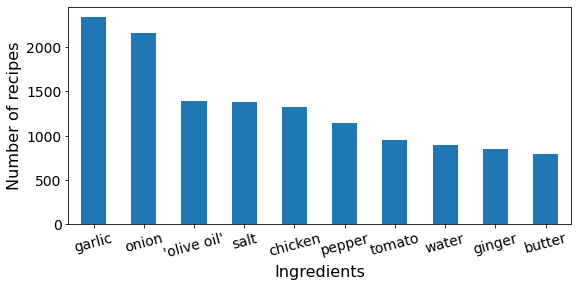

In [31]:
total_ingredient_rank = pd.DataFrame()
total_ingredient_rank = data.sum()
total_ingredient_rank.sort_values(ascending = False,inplace = True)
total_ingredient_rank.drop(['cuisine'],inplace = True)
total_ingredient_rank.to_csv("0-total_ingredient_rank.csv",index=True,sep=',')
ax = total_ingredient_rank[:10].plot(kind="bar",figsize=(9,4),rot=15, fontsize=14)
ax.set_ylabel('Number of recipes', fontsize=16)
ax.set_xlabel('Ingredients', fontsize=16)
plt.savefig('Ingredient distribution over cuisines.pdf', bbox_inches = 'tight')

Ingredient Rank

In [6]:
ingredient_rank = pd.DataFrame()
data_sorted = data.groupby(['cuisine']).sum()
for i in data_sorted.index:
    temp = data_sorted.loc[i].sort_values(ascending = False,inplace = False)
    ingredient_rank[i] = temp.index
ingredient_rank = ingredient_rank.T
ingredient_rank.index = index[1]
ingredient_rank.to_csv("0-ingredient_rank.csv",index=True,sep=',')
ingredient_rank[:15]

,0,1,2,3,4,5,6,7,8,9,...,699,700,701,702,703,704,705,706,707,708
1,,,,,,,,,,,,,,,,,,,,,
Chinese,'soy sauce',garlic,ginger,cornstarch,'green onion',chicken,'vegetable oil',sugar,'sesame oil',water,...,'lasagna noodles',suet,stuffing,strawberry,'straw mushroom','lima bean',liver,lobster,'long grain and wild rice blend','acorn squash'
English,onion,butter,potato,garlic,flour,'olive oil',carrot,beef,chicken,parsley,...,'masa harina',masala,mascarpone,'masoor dal','meat stock','meatloaf mix',mexicorn,truffle,'miracle whip dressing','acorn squash'
French,garlic,butter,wine,onion,'olive oil',salt,pepper,chicken,thyme,flour,...,'mixed spice','mizithra cheese','moroccan seasoning',mortadella,'mung beans','muscovado sugar',watermelon,'mustard oil',watercress,'acorn squash'
German,onion,pepper,salt,flour,water,butter,egg,pork,bacon,beef,...,squid,'lambs kidney','lancashire cheese',squash,lardon,'specialty cheese',spearmint,'lemon grass','spanish chorizo','acorn squash'
Greek,'olive oil',garlic,onion,oregano,tomato,pepper,'feta cheese',salt,'lemon juice',parsley,...,'onion soup','orange rind',oxtails,'oyster sauce',oysters,'Pace Picante Sauce','palm sugar',pancetta,panir,'acorn squash'
Indian,onion,garlic,ginger,cumin,turmeric,salt,coriander,tomato,'vegetable oil',chicken,...,oxtails,'oyster sauce',oysters,'Pace Picante Sauce','palm sugar',pancetta,panko,papaya,'parchment paper','acorn squash'
Italian,garlic,'olive oil','parmesan cheese',onion,pasta,salt,basil,tomato,parsley,pepper,...,'hokkien noodles',hominy,'smoked salmon','smoke seasoning',horseradish,'horseradish sauce','hot bean paste','hot pepper sauce',hummus,'filet mignon'
Japanese,'soy sauce','rice wine',sugar,ginger,garlic,'green onion',water,onion,'vegetable oil',chicken,...,'Italian spices',jaggery,jicama,'juniper berries','kaffir lime','kalamata olive',stilton,'ketjap manis','kidney bean','acorn squash'
Mexican,onion,tortilla,garlic,cumin,salt,chicken,'chili powder',tomato,beef,'chile pepper',...,'oyster sauce',oysters,'palm sugar',pancetta,panir,panko,papaya,'parchment paper',parsnip,'acorn squash'


Type Number

Text(0.5, 0, 'Cuisines')

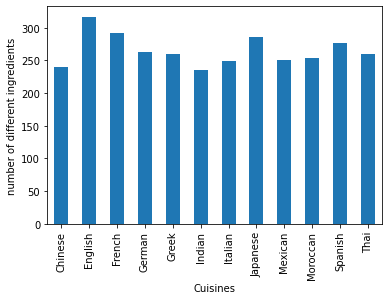

In [7]:
data_sorted = data.groupby(['cuisine']).sum()
data_sorted.index = index[1]
type_number = (data_sorted > 0).astype(int).sum(axis=1)
type_number.to_csv("0-type_number.csv",index=True,sep=',')
ax = type_number.plot(kind="bar")
ax.set_ylabel('number of different ingredients')
ax.set_xlabel('Cuisines')

## 2.Unsupervised_dimensionality_reduction

In [4]:
data = pd.read_csv("recipes.csv")
X = data.drop('cuisine', axis=1).to_numpy(dtype='float64') # Input features
y = ['Chinese']*353 + ['English']*353 + ['French']*353 + ['German']*353 + ['Greek']*353 + ['Indian']*353 + ['Italian']*353 + ['Japanese']*353 + ['Mexican']*353 + ['Moroccan']*353 + ['Spanish']*353 + ['Thai']*353
y = np.array(y)

In [5]:
Asian_country = [0, 5, 7, 11]
Other_country = [1,2,3,4,6,8,9,10]
X_Asian = data[data["cuisine"].isin(Asian_country)].drop('cuisine', axis=1)
X_Other = data[data["cuisine"].isin(Other_country)].drop('cuisine', axis=1)
y_Asian = ['Chinese']*353 + ['Indian']*353 + ['Japanese']*353 + ['Thai']*353
y_Asian = np.array(y_Asian)
y_Other = ['English']*353 + ['French']*353 + ['German']*353 + ['Greek']*353 + ['Italian']*353 + ['Mexican']*353 + ['Moroccan']*353 + ['Spanish']*353
y_Other = np.array(y_Other)
y_TwoPart = [' Asian Cuisines']*353 + ['European, Moroccan and Mexican cuisines']*353+ ['European, Moroccan and Mexican cuisines']*353+ ['European, Moroccan and Mexican cuisines']*353+ ['European, Moroccan and Mexican cuisines']*353+[' Asian Cuisines']*353+ ['European, Moroccan and Mexican cuisines']*353+[' Asian Cuisines']*353+ ['European, Moroccan and Mexican cuisines']*353+ ['European, Moroccan and Mexican cuisines']*353+ ['European, Moroccan and Mexican cuisines']*353+[' Asian Cuisines']*353
y_TwoPart = np.array(y_TwoPart)

In [6]:
def scatter_2d_label(X_2d, y, ax=None, s=2, alpha=0.5, lw=2):
    targets = np.unique(y)
    colors = sns.color_palette(n_colors=targets.size)
    if ax is None:
        fig, ax = plt.subplots()        
    for color, target in zip(colors, targets):
        ax.scatter(X_2d[y == target, 0], X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)
    ax.legend()
    return ax

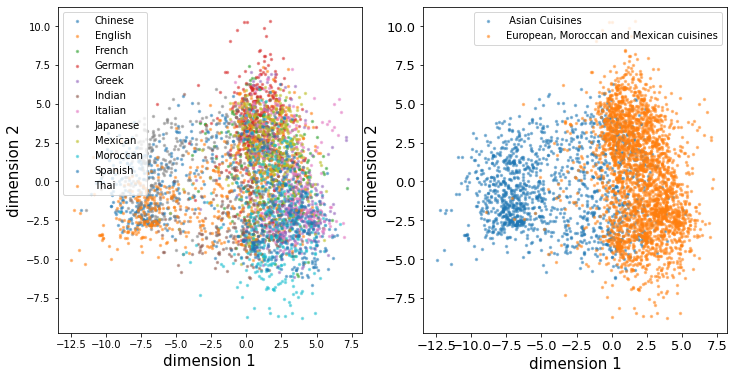

In [30]:
from sklearn.manifold import Isomap
fig, ax = plt.subplots(1,2,figsize=(12,6))

ismp = Isomap(n_components=2, n_neighbors=3)
X_ismp_2d = ismp.fit_transform(X)
cur_ax = ax[0]
scatter_2d_label(X_ismp_2d, y, ax=cur_ax)
cur_ax.set_xlabel('dimension 1', fontsize=15)
cur_ax.set_ylabel('dimension 2', fontsize=15)

cur_ax = ax[1]
scatter_2d_label(X_ismp_2d, y_TwoPart, ax=cur_ax)
cur_ax.set_xlabel('dimension 1', fontsize=15)
cur_ax.set_ylabel('dimension 2', fontsize=15)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('Scatter plot for all Cuisines.pdf', bbox_inches = 'tight')

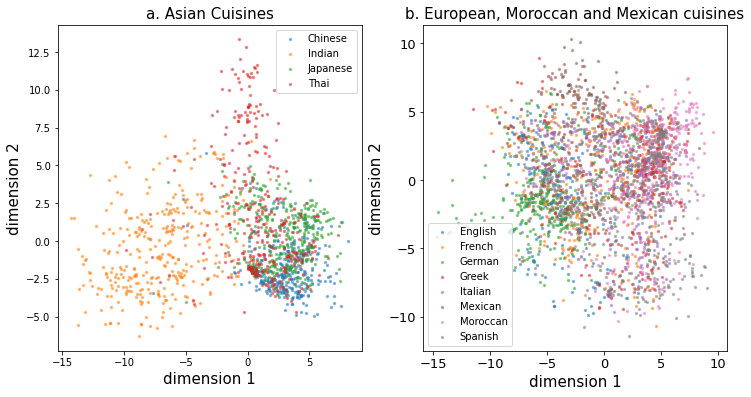

In [27]:
from sklearn.manifold import Isomap
fig, ax = plt.subplots(1,2,figsize=(12,6))

ismp = Isomap(n_components=2, n_neighbors=3)
X_ismp_2d = ismp.fit_transform(X_Asian)
cur_ax = ax[0]
scatter_2d_label(X_ismp_2d, y_Asian, ax=cur_ax)
cur_ax.set_title('a. Asian Cuisines', fontsize=15)
cur_ax.set_xlabel('dimension 1', fontsize=15)
cur_ax.set_ylabel('dimension 2', fontsize=15)

ismp = Isomap(n_components=2, n_neighbors=2)
X_ismp_2d = ismp.fit_transform(X_Other)
cur_ax = ax[1]
scatter_2d_label(X_ismp_2d, y_Other, ax=cur_ax)
cur_ax.set_title("b. European, Moroccan and Mexican cuisines", fontsize=15);
cur_ax.set_xlabel('dimension 1', fontsize=15)
cur_ax.set_ylabel('dimension 2', fontsize=15)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('Scatter plot for two part Cuisines.pdf', bbox_inches = 'tight')